## ZLL Slide Process

### Packages and setup

In [1]:
library(matrixStats)
library("randomForest")

#install.packages("tidyverse")
library(tidyverse)
# Data Handling

if (!requireNamespace("BiocManager"))
    install.packages("BiocManager")
BiocManager::install()
library(BiocManager)
# General bioinformatics packages

library(BSgenome)
library(BSgenome.Hsapiens.UCSC.hg19)
# Human genome build GChr37

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine()  masks randomForest::combine()
✖ dplyr::count()    masks matrixStats::count()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ ggplot2::margin() masks randomForest::margin()
Loading required namespace: BiocManager
Bioconductor version 3.8 (BiocManager 1.30.3), R 3.5.1 (2018-07-02)
Update old packages: 'AnnotationHub', 'backports', 'BH', 'BiocManager',
  'BiocParallel', 'Biostrings', 'biovizBase', 'broom', 'callr', 'checkmate',
  'circlize', 'class', 'clipr', 'clusterProfiler', 'codetools', 'colorspace',
  'cowplot', 'curl', 'data.table', 'dbplyr', 'DESeq', 'DOSE

In [2]:
setwd("/Users/jacobbradley/Documents/CCG/Code")

source("TMB_Funcs.txt")
# My Stuff!

In [3]:
path_name <- "/Volumes/CCG8/processed_data"
genome <- BSgenome.Hsapiens.UCSC.hg19

### Load data sets

In [4]:
three_cancer_data <- cbio_getData(path_name, c("nsclc", "lusc", "skcm"), by_cancer = TRUE)
three_cancer_pooled_data <- cbio_getData(path_name, c("nsclc", "lusc", "skcm"))
nsclc_data <- cbio_getData(path_name, "nsclc")
lusc_data <- cbio_getData(path_name, "lusc")
skcm_data <- cbio_getData(path_name, "skcm")


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "lusc_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Transcript_Exon = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  gc_content = col_double()
)
See spec(...) for full column specifications.


[1] 178


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "lusc_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 469


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "lusc_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double()
  # ... with 23 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“9 parsing failures.
row # A tibble: 5 x 5 col     row col        expected      actual file                                    expecte

[1] 64


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "nsclc_pd1_msk_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 240


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "nsclc_tcga_broad_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_depth = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double()
  # ... with 24 more columns
)
See spec(...) for full column specifications.


[1] 1144


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "nsclc_unito_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Allelic_Frequency = col_double()
)
See spec(...) for full column specifications.


[1] 0


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "skcm_broad"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  tumor_allele_fraction = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_EAS = col_double(),
  MOTIF_POS = col_integer()
  # ... with 6 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“9 parsing failures.
row # A tibble: 5 x 5 col      row col     expected  actual file                              

[1] 121


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_broad_dfarber"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 3 more columns
)
See spec(...) for full column specifications.
Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col     row col    expected     actual                 file                         expected   <int> <chr>  <chr>        <chr>                  <chr>                        actual 1  1343 PUBMED no trailing… ,241,098,

[1] 25


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Transcript_Exon = col_integer(),
  qox = col_double(),
  isArtifactMode = col_integer(),
  pox = col_double(),
  gc_content = col_double(),
  Hotspot = col_integer(),
  UniProt_AApos = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  Protein_position = col_integer(),
  pox_cutoff = col_integer(),
  oxoGCut = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“150071 parsing failures.
row # A tibble: 5 x 5 col     row col      expected         actual file                                   expected   <int> <chr>    <chr>            <chr>

[1] 368


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 440


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_ucla_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  NCBI_Build = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer()
)
See spec(...) for full column specifications.


[1] 38


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_vanderbilt_mskcc_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 66


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_yale"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `MA:FIS` = col_double(),
  Phylop_Conservation_Score = col_double()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“1138 parsing failures.
row # A tibble: 5 x 5 col     row col       expected  actual file                                         expected   <int> <chr>     <chr>     <chr>  <chr>                                        actual 1 24374 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/skcm_yale/dat… file 2 24375 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/skcm_yale/dat… row 3 24376 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/skcm_yale/dat… col 4 

[1] 2602
[1] 1821
[1] 781


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "lusc_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Transcript_Exon = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  gc_content = col_double()
)
See spec(...) for full column specifications.


[1] 178


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "lusc_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 469


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "lusc_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double()
  # ... with 23 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“9 parsing failures.
row # A tibble: 5 x 5 col     row col        expected      actual file                                    expecte

[1] 64


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "nsclc_pd1_msk_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 240


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "nsclc_tcga_broad_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_depth = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double()
  # ... with 24 more columns
)
See spec(...) for full column specifications.


[1] 1144


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "nsclc_unito_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Allelic_Frequency = col_double()
)
See spec(...) for full column specifications.


[1] 0


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "skcm_broad"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  tumor_allele_fraction = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_EAS = col_double(),
  MOTIF_POS = col_integer()
  # ... with 6 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“9 parsing failures.
row # A tibble: 5 x 5 col      row col     expected  actual file                              

[1] 121


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_broad_dfarber"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 3 more columns
)
See spec(...) for full column specifications.
Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col     row col    expected     actual                 file                         expected   <int> <chr>  <chr>        <chr>                  <chr>                        actual 1  1343 PUBMED no trailing… ,241,098,

[1] 25


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Transcript_Exon = col_integer(),
  qox = col_double(),
  isArtifactMode = col_integer(),
  pox = col_double(),
  gc_content = col_double(),
  Hotspot = col_integer(),
  UniProt_AApos = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  Protein_position = col_integer(),
  pox_cutoff = col_integer(),
  oxoGCut = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“150071 parsing failures.
row # A tibble: 5 x 5 col     row col      expected         actual file                                   expected   <int> <chr>    <chr>            <chr>

[1] 368


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 440


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_ucla_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  NCBI_Build = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer()
)
See spec(...) for full column specifications.


[1] 38


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_vanderbilt_mskcc_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 66


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_yale"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `MA:FIS` = col_double(),
  Phylop_Conservation_Score = col_double()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“1138 parsing failures.
row # A tibble: 5 x 5 col     row col       expected  actual file                                         expected   <int> <chr>     <chr>     <chr>  <chr>                                        actual 1 24374 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/skcm_yale/dat… file 2 24375 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/skcm_yale/dat… row 3 24376 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/skcm_yale/dat… col 4 

[1] 2602
[1] 1821
[1] 781


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "nsclc_pd1_msk_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 240


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "nsclc_tcga_broad_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_depth = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double()
  # ... with 24 more columns
)
See spec(...) for full column specifications.


[1] 1144


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "nsclc_unito_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Allelic_Frequency = col_double()
)
See spec(...) for full column specifications.


[1] 0


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 1384
[1] 968
[1] 416


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "lusc_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Transcript_Exon = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  gc_content = col_double()
)
See spec(...) for full column specifications.


[1] 178


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "lusc_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 469


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "lusc_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double()
  # ... with 23 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“9 parsing failures.
row # A tibble: 5 x 5 col     row col        expected      actual file                                    expecte

[1] 64


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 545
[1] 381
[1] 164


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "skcm_broad"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  tumor_allele_fraction = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_EAS = col_double(),
  MOTIF_POS = col_integer()
  # ... with 6 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“9 parsing failures.
row # A tibble: 5 x 5 col      row col     expected  actual file                              

[1] 121


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_broad_dfarber"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 3 more columns
)
See spec(...) for full column specifications.
Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col     row col    expected     actual                 file                         expected   <int> <chr>  <chr>        <chr>                  <chr>                        actual 1  1343 PUBMED no trailing… ,241,098,

[1] 25


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Transcript_Exon = col_integer(),
  qox = col_double(),
  isArtifactMode = col_integer(),
  pox = col_double(),
  gc_content = col_double(),
  Hotspot = col_integer(),
  UniProt_AApos = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  Protein_position = col_integer(),
  pox_cutoff = col_integer(),
  oxoGCut = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“150071 parsing failures.
row # A tibble: 5 x 5 col     row col      expected         actual file                                   expected   <int> <chr>    <chr>            <chr>

[1] 368


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 440


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_ucla_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  NCBI_Build = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer()
)
See spec(...) for full column specifications.


[1] 38


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_vanderbilt_mskcc_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 66


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_yale"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `MA:FIS` = col_double(),
  Phylop_Conservation_Score = col_double()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“1138 parsing failures.
row # A tibble: 5 x 5 col     row col       expected  actual file                                         expected   <int> <chr>     <chr>     <chr>  <chr>                                        actual 1 24374 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/skcm_yale/dat… file 2 24375 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/skcm_yale/dat… row 3 24376 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/skcm_yale/dat… col 4 

[1] 673
[1] 471
[1] 202


### Run RLL and ZLL on individual and pooled groups

In [5]:
#message("zll_3")
#zll_3 <- ZLL_slide(maf_file = three_cancer_data[["training_data"]], starting_window = 2**20,
                          iterations = 11, zoom = 2, pan_bias = 2, coverage = 1)
zll_3 <- read_rds("/Users/jacobbradley/Documents/CCG/Data/zll_3")

#message("rll_3")
#rll_3 <- RLL_slide(maf_file = three_cancer_pooled_data[["training_data"]], starting_window = 2**20, iterations = 11, zoom = 2, coverage = 1)
rll_3 <- read_rds("/Users/jacobbradley/Documents/CCG/Data/rll_3")

#message("rll_nsclc")
#rll_nsclc <- RLL_slide(maf_file = nsclc_data[["training_data"]], starting_window = 2**20, iterations = 11, zoom = 2, coverage = 1)
rll_nsclc <- read_rds("/Users/jacobbradley/Documents/CCG/Data/rll_nsclc")

# message("rll_lusc")
# rll_lusc <- RLL_slide(maf_file = lusc_data[["training_data"]], starting_window = 2**20, iterations = 11, zoom = 2, coverage = 1)
rll_lusc <- read_rds("/Users/jacobbradley/Documents/CCG/Data/rll_lusc")

# message("rll_skcm")
# rll_skcm <- RLL_slide(maf_file = skcm_data[["training_data"]], starting_window = 2**20, iterations = 11, zoom = 2, coverage = 1)
rll_skcm <- read_rds("/Users/jacobbradley/Documents/CCG/Data/rll_skcm")


zll_3
Iteration 1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
Iteration 2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
Iteration 3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
Iteration 4
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
Iteration 5
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y
Iteration 6
1
2
3
4

In [17]:
write_rds(zll_3, path = "/Users/jacobbradley/Documents/CCG/Data/zll_3")
write_rds(rll_3, path = "/Users/jacobbradley/Documents/CCG/Data/rll_3")
write_rds(rll_nsclc, path = "/Users/jacobbradley/Documents/CCG/Data/rll_nsclc")
write_rds(rll_lusc, path = "/Users/jacobbradley/Documents/CCG/Data/rll_lusc")
write_rds(rll_skcm, path = "/Users/jacobbradley/Documents/CCG/Data/rll_skcm")

### Model generation across a variety of panel sizes

In [6]:
# message("zll_3")
# zll_3_psa <- RLL_analyse_panel_size(zll_3, three_cancer_data, panel_sizes = seq(from = 2**20, to = 5*(2**19), by = 2**19), max_windows = 10**4)
zll_3_psa <- read_rds("/Users/jacobbradley/Documents/CCG/Data/zll_3_psa")

# message("rll_3")
# rll_3_psa <- RLL_analyse_panel_size(rll_3, three_cancer_pooled_data, panel_sizes = seq(from = 2**20, to = 5*(2**19), by = 2**19), max_windows = 10**4)
rll_3_psa <- read_rds("/Users/jacobbradley/Documents/CCG/Data/rll_3_psa")

# message("rll_nsclc")
# rll_nsclc_psa <- RLL_analyse_panel_size(rll_nsclc, nsclc_data, panel_sizes = seq(from = 2**20, to = 5*(2**19), by = 2**19), max_windows = 10**4)
rll_nsclc_psa <- read_rds("/Users/jacobbradley/Documents/CCG/Data/rll_nsclc_psa")

# message("rll_lusc")
# rll_lusc_psa <- RLL_analyse_panel_size(rll_lusc, lusc_data, panel_sizes = seq(from = 2**20, to = 5*(2**19), by = 2**19), max_windows = 10**4)
rll_lusc_psa <- read_rds("/Users/jacobbradley/Documents/CCG/Data/rll_lusc_psa")

# message("rll_skcm")
# rll_skcm_psa <- RLL_analyse_panel_size(rll_skcm, skcm_data, panel_sizes = seq(from = 2**20, to = 5*(2**19), by = 2**19), max_windows = 10**4)
rll_skcm_psa <- read_rds("/Users/jacobbradley/Documents/CCG/Data/rll_skcm_psa")


zll_3
panel size 1048576
making windows
making matrices


# A tibble: 2,206 x 2
   Window_1 Window_2
      <dbl>    <dbl>
 1        0        0
 2        0        0
 3        0        0
 4        0        0
 5        0        0
 6        0        0
 7        0        0
 8        0        0
 9        0        0
10        0        0
# ... with 2,196 more rows


making linear models
making random forest models
making test matrices
panel size 1572864
making windows
making matrices


# A tibble: 2,206 x 2
   Window_1 Window_2
      <dbl>    <dbl>
 1        0        0
 2        0        0
 3        0        0
 4        0        0
 5        0        0
 6        0        0
 7        0        0
 8        0        0
 9        0        0
10        0        0
# ... with 2,196 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”panel size 2097152
making windows
making matrices


# A tibble: 2,206 x 3
   Window_1 Window_2 Window_3
      <dbl>    <dbl>    <dbl>
 1        0        0        0
 2        0        0        0
 3        0        0        0
 4        0        0        0
 5        0        0        0
 6        0        0        0
 7        0        0        0
 8        0        0        0
 9        0        0        0
10        0        0        0
# ... with 2,196 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”panel size 2621440
making windows
making matrices


# A tibble: 2,206 x 4
   Window_1 Window_2 Window_3 Window_4
      <dbl>    <dbl>    <dbl>    <dbl>
 1        0        0        0        0
 2        0        0        0        0
 3        0        0        0        0
 4        0        0        0        0
 5        0        0        0        0
 6        0        0        0        0
 7        0        0        0        0
 8        0        0        0        0
 9        0        0        0        0
10        0        0        0        0
# ... with 2,196 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”rll_3
panel size 1048576
making windows
making matrices


# A tibble: 2,203 x 2
   Window_1 Window_2
      <dbl>    <dbl>
 1        0        0
 2        0        0
 3        0        0
 4        0        0
 5        0        0
 6        0        0
 7        0        0
 8        0        0
 9        0        0
10        0        0
# ... with 2,193 more rows


making linear models
making random forest models
making test matrices
panel size 1572864
making windows
making matrices


# A tibble: 2,203 x 3
   Window_1 Window_2 Window_3
      <dbl>    <dbl>    <dbl>
 1        0        0        0
 2        0        0        0
 3        0        0        0
 4        0        0        0
 5        0        0        0
 6        0        0        0
 7        0        0        0
 8        0        0        0
 9        0        0        0
10        0        0        0
# ... with 2,193 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”panel size 2097152
making windows
making matrices


# A tibble: 2,203 x 4
   Window_1 Window_2 Window_3 Window_4
      <dbl>    <dbl>    <dbl>    <dbl>
 1        0        0        0        0
 2        0        0        0        0
 3        0        0        0        0
 4        0        0        0        0
 5        0        0        0        0
 6        0        0        0        0
 7        0        0        0        0
 8        0        0        0        0
 9        0        0        0        0
10        0        0        0        0
# ... with 2,193 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”panel size 2621440
making windows
making matrices


# A tibble: 2,203 x 5
   Window_1 Window_2 Window_3 Window_4 Window_5
      <dbl>    <dbl>    <dbl>    <dbl>    <dbl>
 1        0        0        0        0        0
 2        0        0        0        0        0
 3        0        0        0        0        0
 4        0        0        0        0        0
 5        0        0        0        0        0
 6        0        0        0        0        0
 7        0        0        0        0        0
 8        0        0        0        0        0
 9        0        0        0        0        0
10        0        0        0        0        0
# ... with 2,193 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”rll_nsclc
panel size 1048576
making windows
making matrices


# A tibble: 968 x 2
   Window_1 Window_2
      <dbl>    <dbl>
 1        0        0
 2        2        0
 3        1        3
 4        2        0
 5        0        0
 6        0        1
 7        2        0
 8        0        0
 9        0        0
10        5        3
# ... with 958 more rows


making linear models
making random forest models
making test matrices
panel size 1572864
making windows
making matrices


# A tibble: 968 x 3
   Window_1 Window_2 Window_3
      <dbl>    <dbl>    <dbl>
 1        0        0        0
 2        2        0        0
 3        1        3        0
 4        2        0        1
 5        0        0        0
 6        0        1        1
 7        2        0        0
 8        0        0        1
 9        0        0        0
10        5        3        1
# ... with 958 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”panel size 2097152
making windows
making matrices


# A tibble: 968 x 4
   Window_1 Window_2 Window_3 Window_4
      <dbl>    <dbl>    <dbl>    <dbl>
 1        0        0        0        0
 2        2        0        0        1
 3        1        3        0        0
 4        2        0        1        0
 5        0        0        0        0
 6        0        1        1        2
 7        2        0        0        0
 8        0        0        1        1
 9        0        0        0        0
10        5        3        1        6
# ... with 958 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”panel size 2621440
making windows
making matrices


# A tibble: 968 x 5
   Window_1 Window_2 Window_3 Window_4 Window_5
      <dbl>    <dbl>    <dbl>    <dbl>    <dbl>
 1        0        0        0        0        0
 2        2        0        0        1        2
 3        1        3        0        0        0
 4        2        0        1        0        1
 5        0        0        0        0        0
 6        0        1        1        2        1
 7        2        0        0        0        0
 8        0        0        1        1        3
 9        0        0        0        0        0
10        5        3        1        6        3
# ... with 958 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”rll_lusc
panel size 1048576
making windows
making matrices


# A tibble: 500 x 2
   Window_1 Window_2
      <dbl>    <dbl>
 1        0        2
 2        0        2
 3        2        5
 4        0        1
 5        0        1
 6        1        0
 7        0        0
 8        0        0
 9       26       15
10       26       15
# ... with 490 more rows


making linear models
making random forest models
making test matrices
panel size 1572864
making windows
making matrices


# A tibble: 500 x 2
   Window_1 Window_2
      <dbl>    <dbl>
 1        1        2
 2        1        2
 3        2        5
 4        0        1
 5        0        1
 6        1        0
 7        0        0
 8        0        0
 9       42       15
10       42       15
# ... with 490 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”panel size 2097152
making windows
making matrices


# A tibble: 500 x 3
   Window_1 Window_2 Window_3
      <dbl>    <dbl>    <dbl>
 1        1        0        2
 2        1        0        2
 3        2        0        5
 4        0        0        1
 5        0        0        1
 6        1        0        0
 7        0        0        0
 8        0        0        0
 9       42        2       15
10       42        2       15
# ... with 490 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”panel size 2621440
making windows
making matrices


# A tibble: 500 x 4
   Window_1 Window_2 Window_3 Window_4
      <dbl>    <dbl>    <dbl>    <dbl>
 1        1        0        2        0
 2        1        0        2        0
 3        2        0        5        0
 4        0        0        1        0
 5        0        0        1        0
 6        1        0        0        0
 7        0        0        0        0
 8        0        0        0        0
 9       42        2       15        1
10       42        2       15        1
# ... with 490 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”rll_skcm
panel size 1048576
making windows
making matrices


# A tibble: 746 x 2
   Window_1 Window_2
      <dbl>    <dbl>
 1        0        0
 2        0        0
 3        0        0
 4        0        0
 5        0        0
 6        0        0
 7        0        0
 8        0        0
 9        0        0
10        0        0
# ... with 736 more rows


making linear models
making random forest models
making test matrices
panel size 1572864
making windows
making matrices


# A tibble: 746 x 3
   Window_1 Window_2 Window_3
      <dbl>    <dbl>    <dbl>
 1        0        0        0
 2        0        0        0
 3        0        0        0
 4        0        0        0
 5        0        0        0
 6        0        0        0
 7        0        0        0
 8        0        0        0
 9        0        0        0
10        0        0        0
# ... with 736 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”panel size 2097152
making windows
making matrices


# A tibble: 746 x 4
   Window_1 Window_2 Window_3 Window_4
      <dbl>    <dbl>    <dbl>    <dbl>
 1        0        0        0        0
 2        0        0        0        0
 3        0        0        0        0
 4        0        0        0        0
 5        0        0        0        0
 6        0        0        0        0
 7        0        0        0        0
 8        0        0        0        0
 9        0        0        0        0
10        0        0        0        0
# ... with 736 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”panel size 2621440
making windows
making matrices


# A tibble: 746 x 5
   Window_1 Window_2 Window_3 Window_4 Window_5
      <dbl>    <dbl>    <dbl>    <dbl>    <dbl>
 1        0        0        0        0        0
 2        0        0        0        0        0
 3        0        0        0        0        0
 4        0        0        0        0        0
 5        0        0        0        0        0
 6        0        0        0        0        0
 7        0        0        0        0        0
 8        0        0        0        0        0
 9        0        0        0        0        0
10        0        0        0        0        0
# ... with 736 more rows


making linear models
making random forest models
making test matrices
Warning message in if (is.na(rll_objects)) {:
“the condition has length > 1 and only the first element will be used”

In [18]:
write_rds(zll_3_psa, path = "/Users/jacobbradley/Documents/CCG/Data/zll_3_psa")
write_rds(rll_3_psa, path = "/Users/jacobbradley/Documents/CCG/Data/rll_3_psa")
write_rds(rll_nsclc_psa, path = "/Users/jacobbradley/Documents/CCG/Data/rll_nsclc_psa")
write_rds(rll_lusc_psa, path = "/Users/jacobbradley/Documents/CCG/Data/rll_lusc_psa")
write_rds(rll_skcm_psa, path = "/Users/jacobbradley/Documents/CCG/Data/rll_skcm_psa")

Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in 

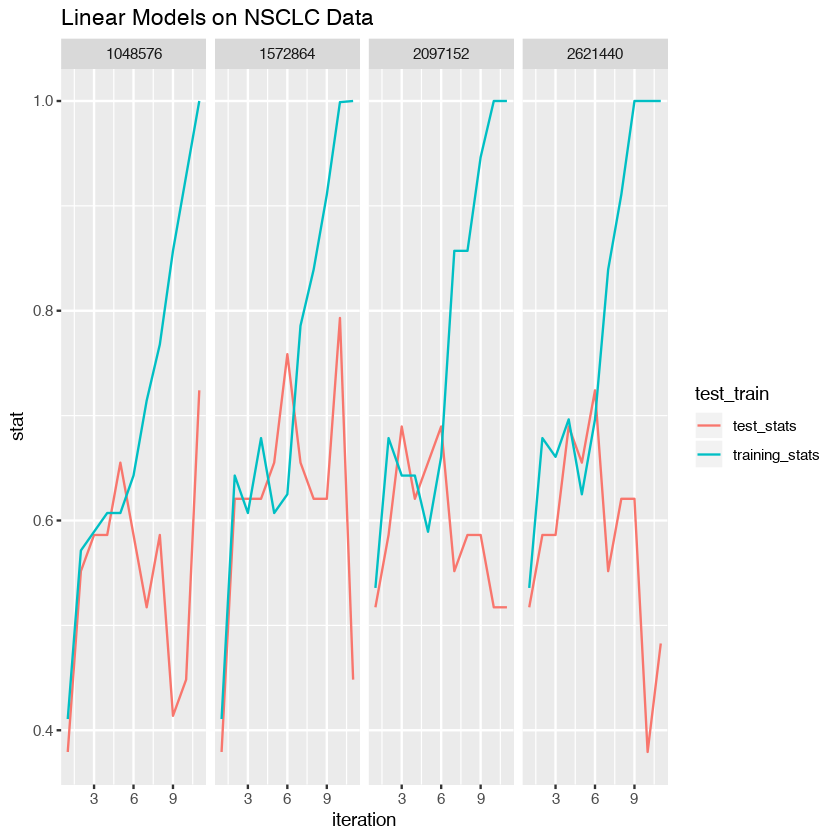

In [27]:
RLL_panel_size_test(rll_nsclc_psa, type = "Cmin", which_model = "OLM") %>% 
    ggplot(aes(x = iteration, y = stat, colour = test_train)) + geom_line() + 
    facet_grid(~size) + ggtitle("Linear Models on NSCLC Data")


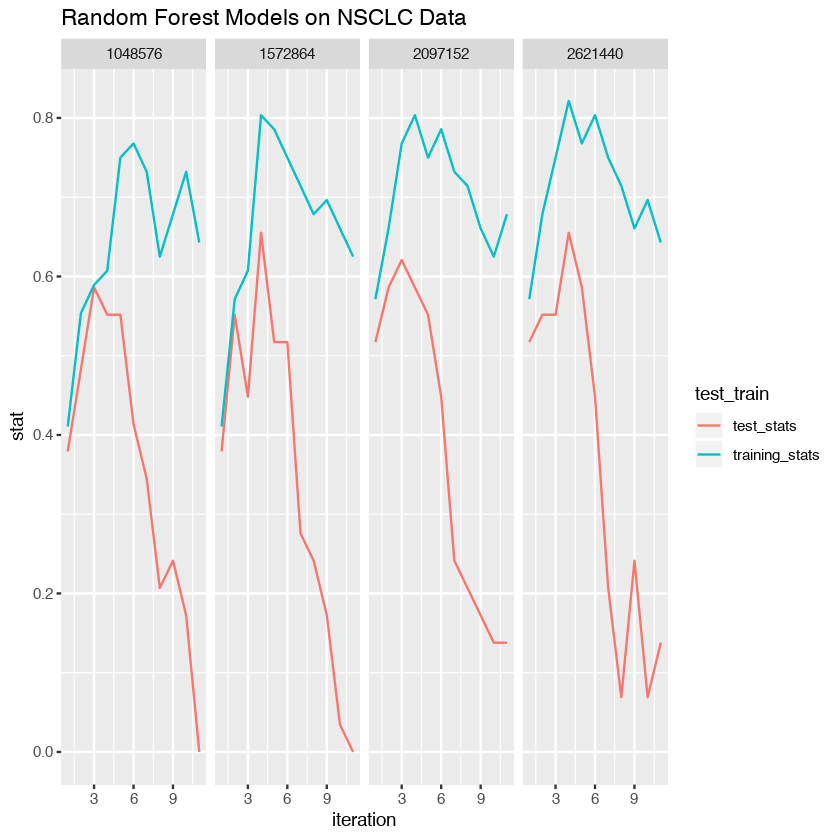

In [28]:
RLL_panel_size_test(rll_nsclc_psa, type = "Cmin", which_model = "RF") %>% 
    ggplot(aes(x = iteration, y = stat, colour = test_train)) + geom_line() + 
    facet_grid(~size) + ggtitle("Random Forest Models on NSCLC Data")


Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in 

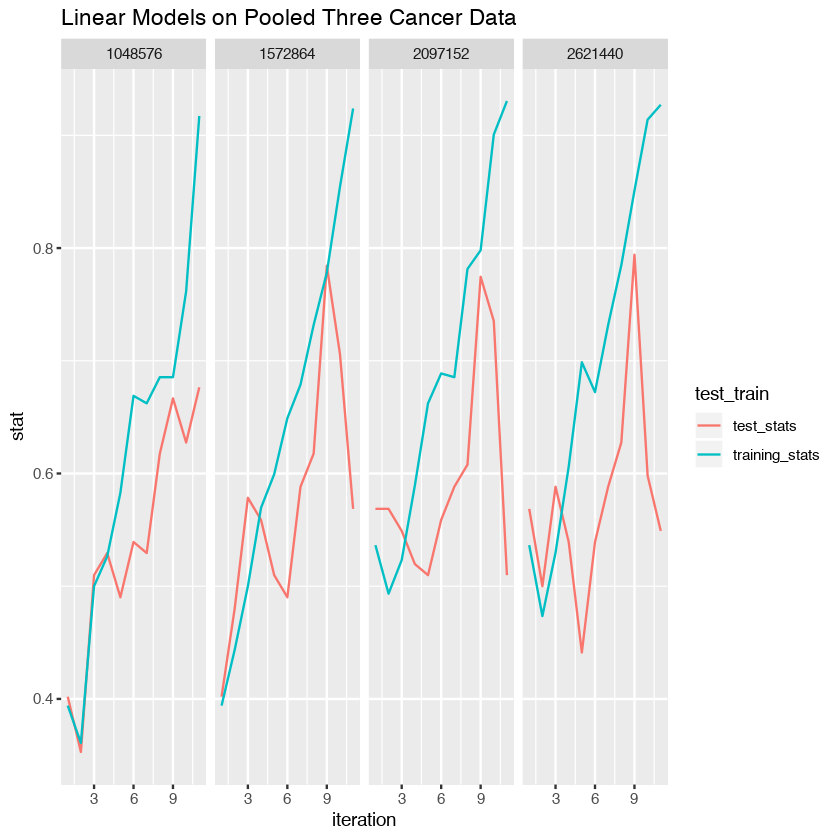

In [31]:
RLL_panel_size_test(rll_3_psa, type = "Cmin", which_model = "OLM") %>% 
    ggplot(aes(x = iteration, y = stat, colour = test_train)) + geom_line() + 
    facet_grid(~size) + ggtitle("Linear Models on Pooled Three Cancer Data")

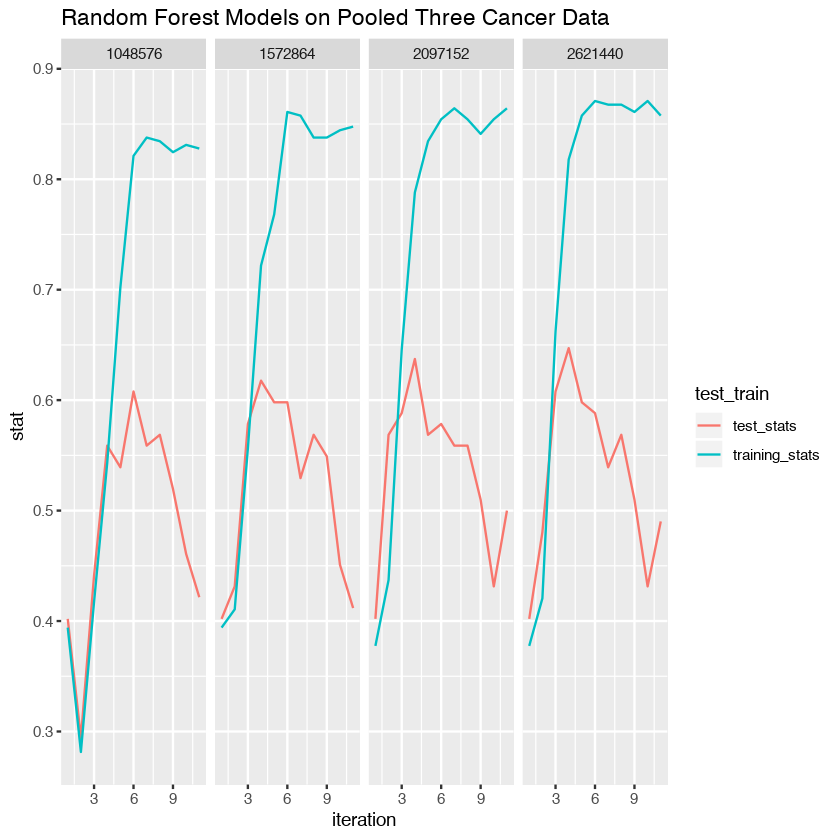

In [32]:
RLL_panel_size_test(rll_3_psa, type = "Cmin", which_model = "RF") %>% 
    ggplot(aes(x = iteration, y = stat, colour = test_train)) + geom_line() + 
    facet_grid(~size) + ggtitle("Random Forest Models on Pooled Three Cancer Data")

Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(model, window_matrix):
“prediction from a rank-deficient fit may be misleading”Warning message in 

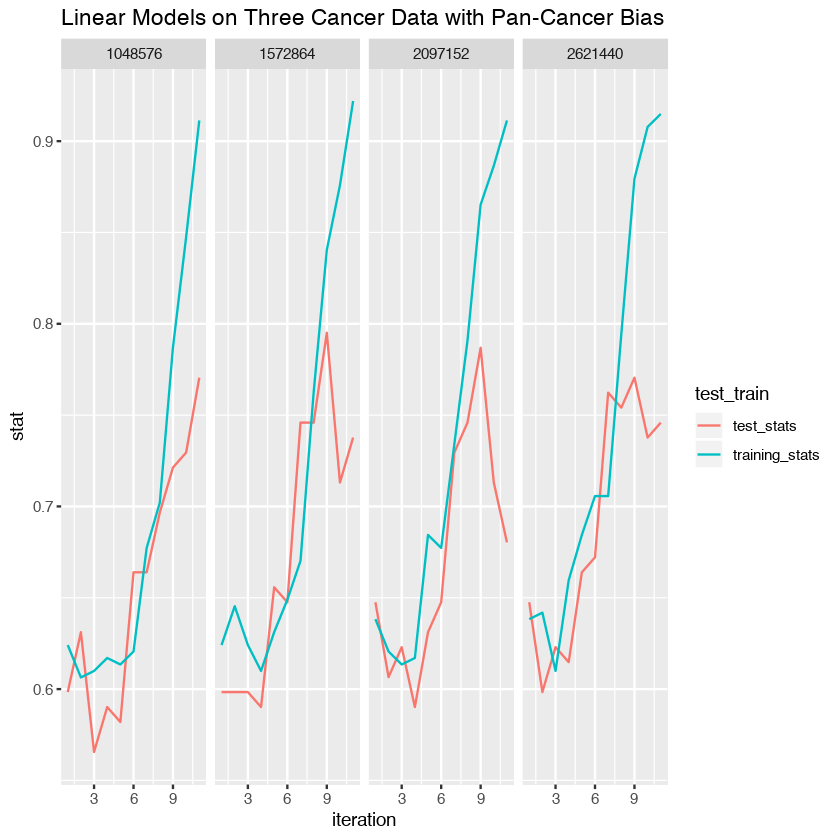

In [29]:
RLL_panel_size_test(zll_3_psa, type = "Cmin", which_model = "OLM") %>% 
    ggplot(aes(x = iteration, y = stat, colour = test_train)) + geom_line() + 
    facet_grid(~size) + ggtitle("Linear Models on Three Cancer Data with Pan-Cancer Bias")

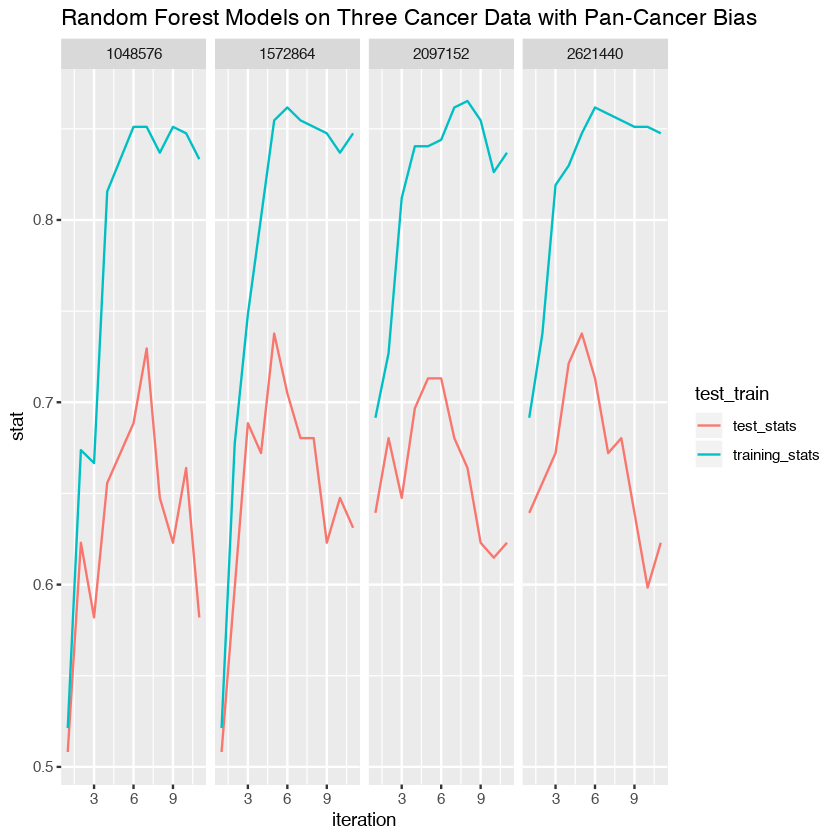

In [30]:
RLL_panel_size_test(zll_3_psa, type = "Cmin", which_model = "RF") %>% 
    ggplot(aes(x = iteration, y = stat, colour = test_train)) + geom_line() + 
    facet_grid(~size) + ggtitle("Random Forest Models on Three Cancer Data with Pan-Cancer Bias")